In [82]:
!pip3 install matplotlib sklearn pandas

In [83]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

## Digits dataset loading

In [84]:
from sklearn import datasets
digits = datasets.load_digits()
# Take the first 500 data points: it's hard to see 1500 points
X = digits.data[:500]
y = digits.target[:500]
labels = np.unique(y)

print(X[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [86]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X))
X_scaled.shape

(500, 64)

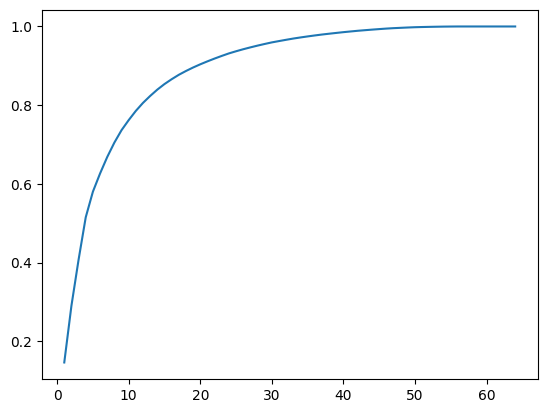

In [87]:
from sklearn.decomposition import PCA

sz = len(X_scaled.columns)
pca = PCA(n_components=sz)
pca.fit(X_scaled) 
ss = 0; xx = []; yy = []
for i in range(sz):
    ss += pca.explained_variance_ratio_[i]
    xx.append(i+1)
    yy.append(ss)
plt.plot(xx,yy)

In [88]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled) 

PCA(n_components=2)

In [89]:
pca.explained_variance_ratio_

array([0.14617233, 0.14402927])

In [90]:
X_pca = pca.transform(X_scaled)
X_pca.shape

(500, 2)

Question: How good is the result of the plot representation above?
\\ Answer: It depends of what you are trying to do next! Is it to:
(1) Identify outliers?
(2) Identify clusters?
(3) Make a predictor?

# PCA to visualize digits

PCA normalizes and whitens the data, which means that the data is now centered on both components with unit variance:

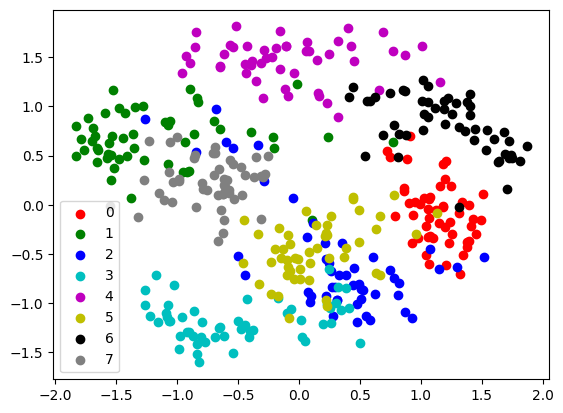

In [91]:
colors = 'r','g','b','c','m','y','k','gray'
for i, c, label in zip(labels, colors, labels): #labels 2x to get the actual values and respect classifications
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], c=c, label=label) #first component (x), correspondent to column 0 of the PCA (PC1), and second (y), to column 1 of the PCA (PC2)
plt.legend()


# tSNE to visualize digits


Here we use :class:`sklearn.manifold.TSNE` to visualize the digits
datasets. Indeed, the digits are vectors in a 8*8 = 64 dimensional space.
We want to project them in 2D for visualization. tSNE is often a good
solution, as it groups and separates data points based on their local
relationship.




Load the iris data (again)


In [92]:
from sklearn import datasets
digits = datasets.load_digits()
# Take the first 500 data points: it's hard to see 1500 points
X = digits.data[:500]
y = digits.target[:500]
labels = np.unique(y)
print(X[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [93]:
X.shape

(500, 64)

In [94]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X))
X_scaled.shape

(500, 64)

In [95]:
from sklearn.manifold import TSNE

sz = len(X_scaled.columns)
pca = TSNE(n_components=2)
X_pca = pca.fit_transform(X_scaled)

/Users/joaoantonio/Documents/Course/env_course/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/joaoantonio/Documents/Course/env_course/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Fit and transform with a TSNE



Project the data in 2D



Visualize the data



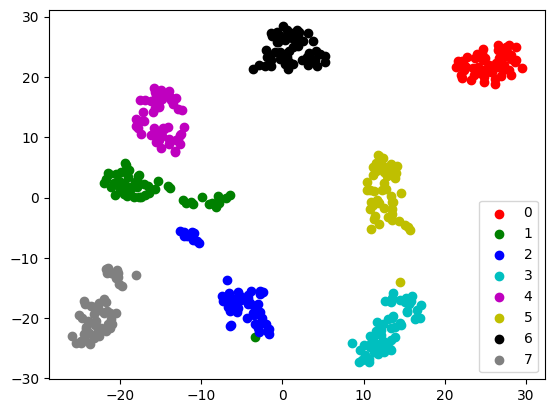

In [96]:
colors = 'r','g','b','c','m','y','k','gray'
for i, c, label in zip(labels, colors, labels): #labels 2x to get the actual values and respect classifications
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], c=c, label=label) #first component (x), correspondent to column 0 of the PCA (PC1), and second (y), to column 1 of the PCA (PC2)
plt.legend()